# Importing necessary libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [2]:
# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)

In [3]:
df = pd.read_csv("Customer Conversion Prediction - Customer Conversion Prediction.csv")

In [4]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
df.describe().T.head(4)

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
dur,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
num_calls,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0


In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [7]:
df.duplicated().sum()

6

In [8]:
df.drop_duplicates(keep="first",inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df_num = df.select_dtypes(exclude=object)
df_num.transpose()

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
age,58,44,33,47,33,35,28,42,58,43,...,53,34,23,73,25,51,71,72,57,37
day,5,5,5,5,5,5,5,5,5,5,...,17,17,17,17,17,17,17,17,17,17
dur,261,151,76,92,198,139,217,380,50,55,...,226,224,266,300,386,977,456,1127,508,361
num_calls,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,2,3,2,5,4,2


In [11]:
df_obj = df.select_dtypes(object)
df_obj.transpose()

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician,...,management,admin.,student,retired,technician,technician,retired,retired,blue-collar,entrepreneur
marital,married,single,married,married,single,married,single,divorced,married,single,...,married,single,single,married,single,married,divorced,married,married,married
education_qual,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary,secondary,...,tertiary,secondary,tertiary,secondary,secondary,tertiary,primary,secondary,secondary,secondary
call_type,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,telephone,cellular
mon,may,may,may,may,may,may,may,may,may,may,...,nov,nov,nov,nov,nov,nov,nov,nov,nov,nov
prev_outcome,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,success,unknown,unknown,failure,unknown,unknown,unknown,success,unknown,other
y,no,no,no,no,no,no,no,no,no,no,...,yes,yes,yes,yes,yes,yes,yes,yes,no,no


In [12]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [13]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [14]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [15]:
df.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [16]:
df.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [17]:
df.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [18]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [19]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [20]:
df.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [21]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [22]:
df.y.notna

<bound method Series.notna of 0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45205, dtype: object>

In [23]:
# Merging unknown as other

df['prev_outcome'] = df['prev_outcome'].replace('unknown', 'other')


# Visualization

Text(0.5, 1.0, 'Distribution of Policy Taken')

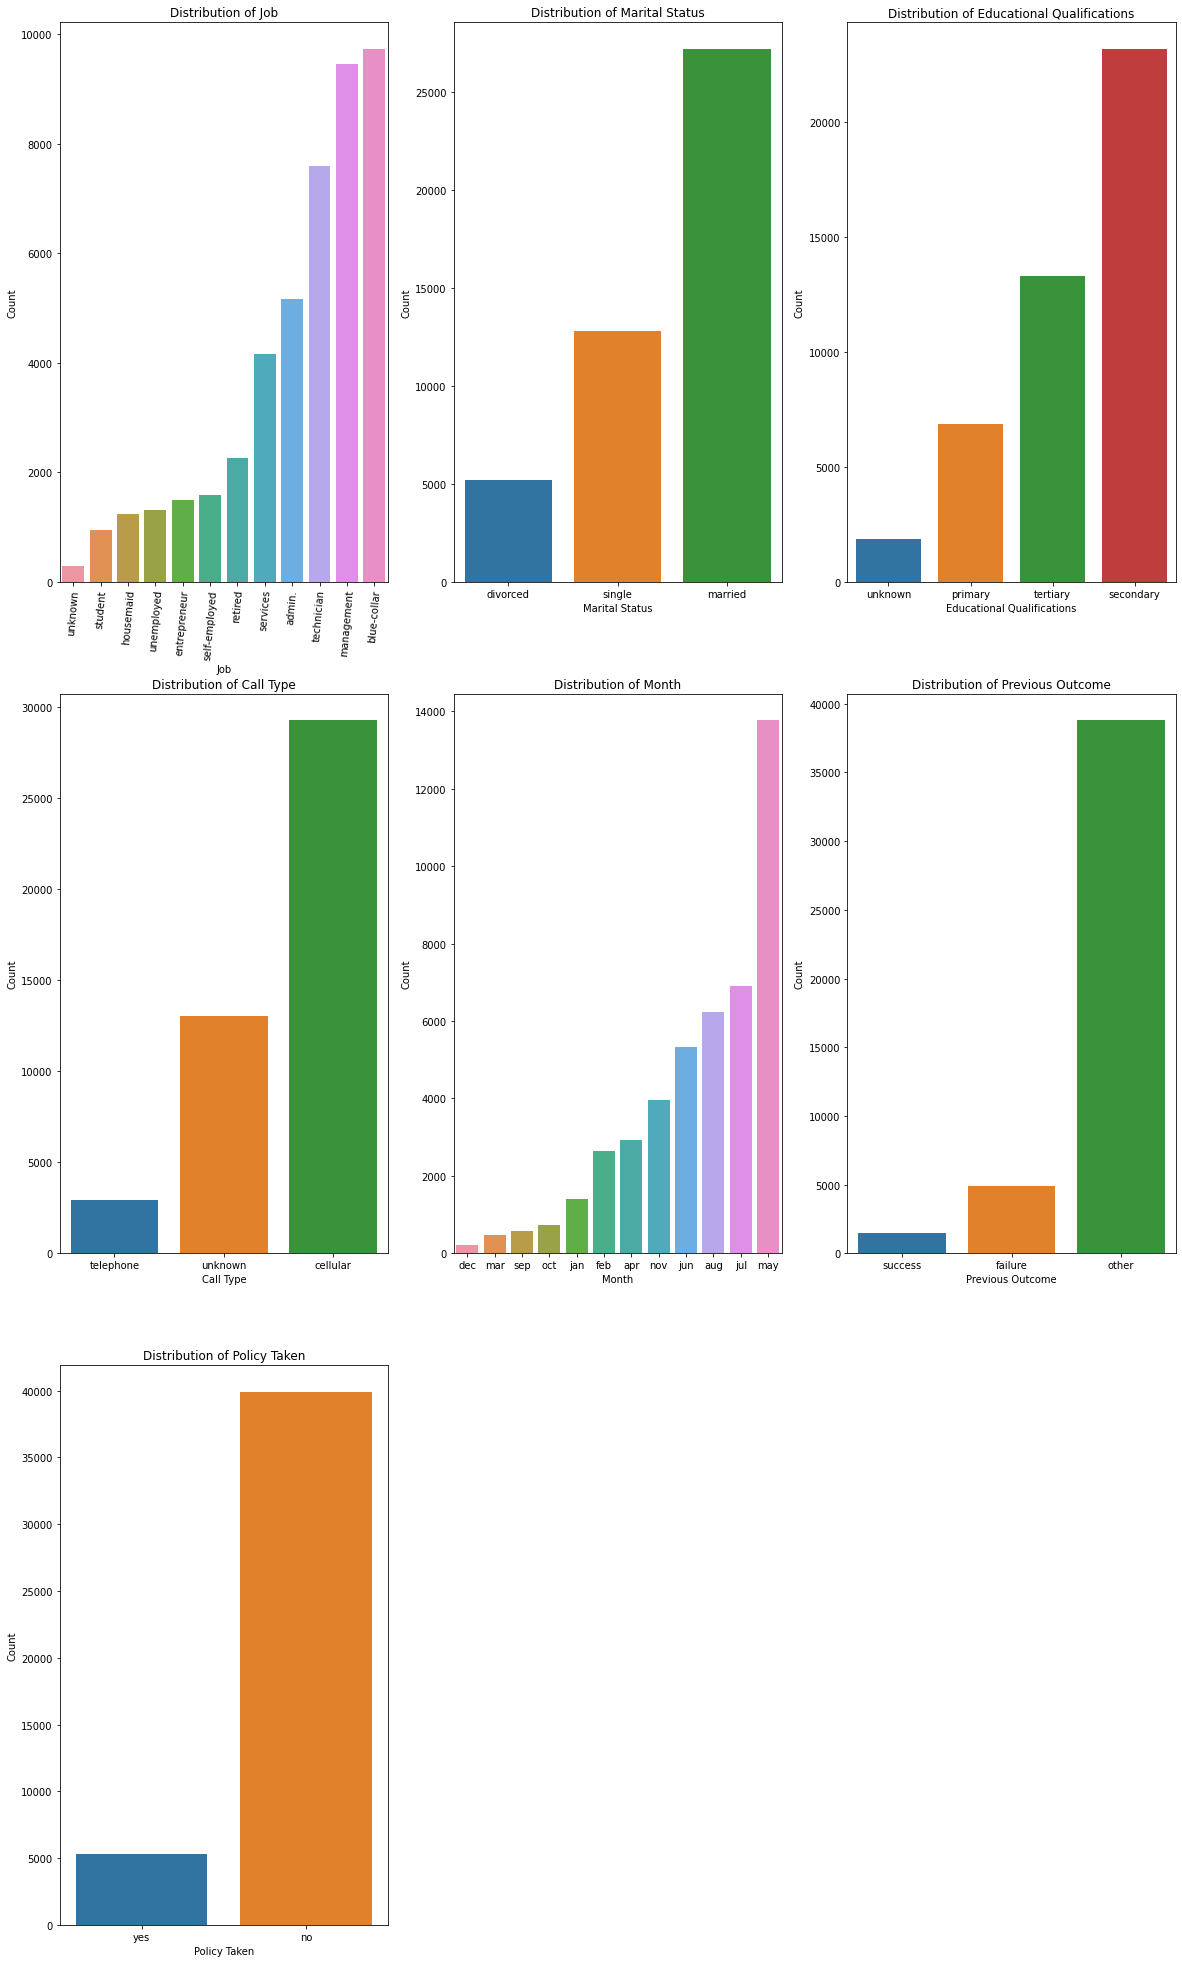

In [24]:
# plotting count plots for all the categorical columns

import seaborn as sns

plt.figure(figsize=(20,35))

plt.subplot(331)
sns.countplot(x=df['job'],order=df['job'].value_counts().index[::-1])
plt.xticks(rotation=85)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Distribution of Job')

plt.subplot(332)
sns.countplot(x=df['marital'],order=df['marital'].value_counts().index[::-1])
# plt.xticks(rotation=85)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')

plt.subplot(333)
sns.countplot(x=df['education_qual'],order=df['education_qual'].value_counts().index[::-1])
# plt.xticks(rotation=85)
plt.xlabel('Educational Qualifications')
plt.ylabel('Count')
plt.title('Distribution of Educational Qualifications')

plt.subplot(334)
sns.countplot(x=df['call_type'],order=df['call_type'].value_counts().index[::-1])
# plt.xticks(rotation=85)
plt.xlabel('Call Type')
plt.ylabel('Count')
plt.title('Distribution of Call Type')

plt.subplot(335)
sns.countplot(x=df['mon'],order=df['mon'].value_counts().index[::-1])
# plt.xticks(rotation=85)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Month')

plt.subplot(336)
sns.countplot(x=df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1])
# plt.xticks(rotation=85)
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.title('Distribution of Previous Outcome')

plt.subplot(337)
sns.countplot(x=df['y'],order=df['y'].value_counts().index[::-1])
# plt.xticks(rotation=85)
plt.xlabel('Policy Taken')
plt.ylabel('Count')
plt.title('Distribution of Policy Taken')





Interpretations:
1. Most number of jobs are of blue collar jobs.
2. Married customers are more.
3. Majority of people are having secondary education.
4. Most number of callers are cell phone users.
5. There are more customers joined in the month of May than any other month.
6. There are more number of customers who did not take Policy.

In [25]:
df_obj.columns

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')

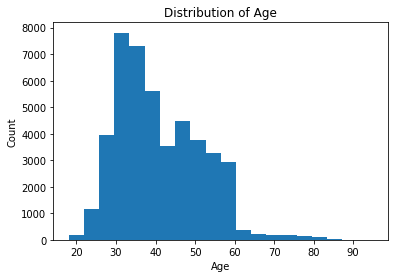

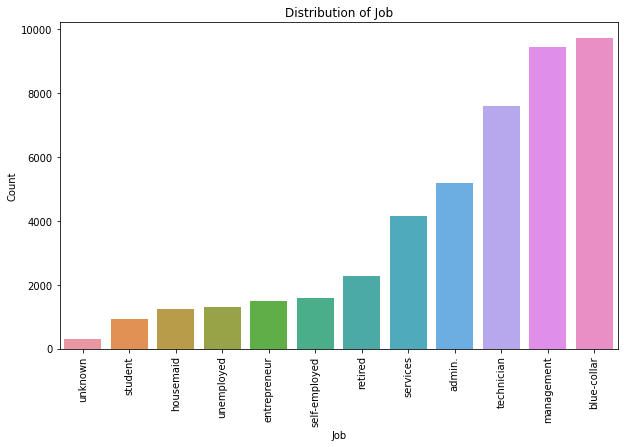

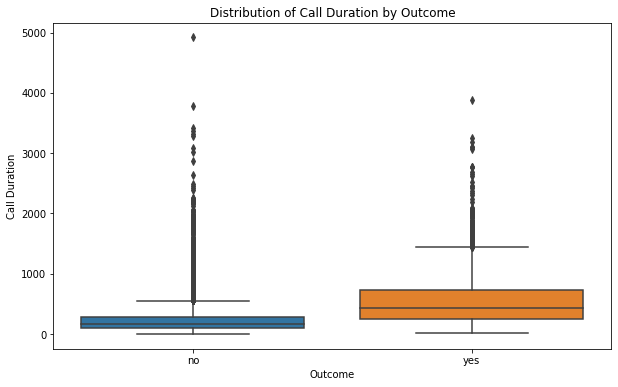

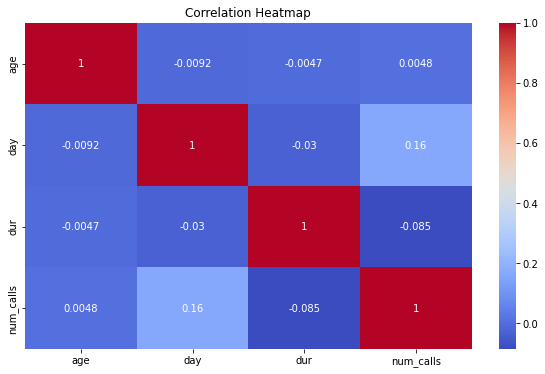

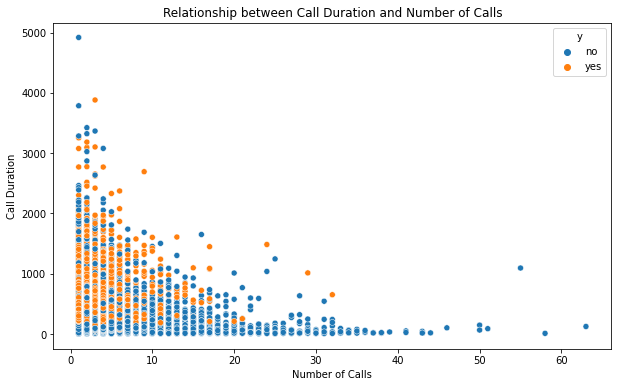

In [26]:
# Histogram of the age feature
plt.hist(df["age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()

# Bar chart of the job feature
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="job",order=df["job"].value_counts().index[::-1])
plt.xticks(rotation=90)
plt.xlabel("Job")
plt.ylabel("Count")
plt.title("Distribution of Job")
plt.show()

# Boxplot of the call duration feature grouped by outcome
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="y", y="dur")
plt.xlabel("Outcome")
plt.ylabel("Call Duration")
plt.title("Distribution of Call Duration by Outcome")
plt.show()

# Heatmap of feature correlation
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Scatterplot of call duration and number of calls features
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="num_calls", y="dur", hue="y")
plt.xlabel("Number of Calls")
plt.ylabel("Call Duration")
plt.title("Relationship between Call Duration and Number of Calls")
plt.show()

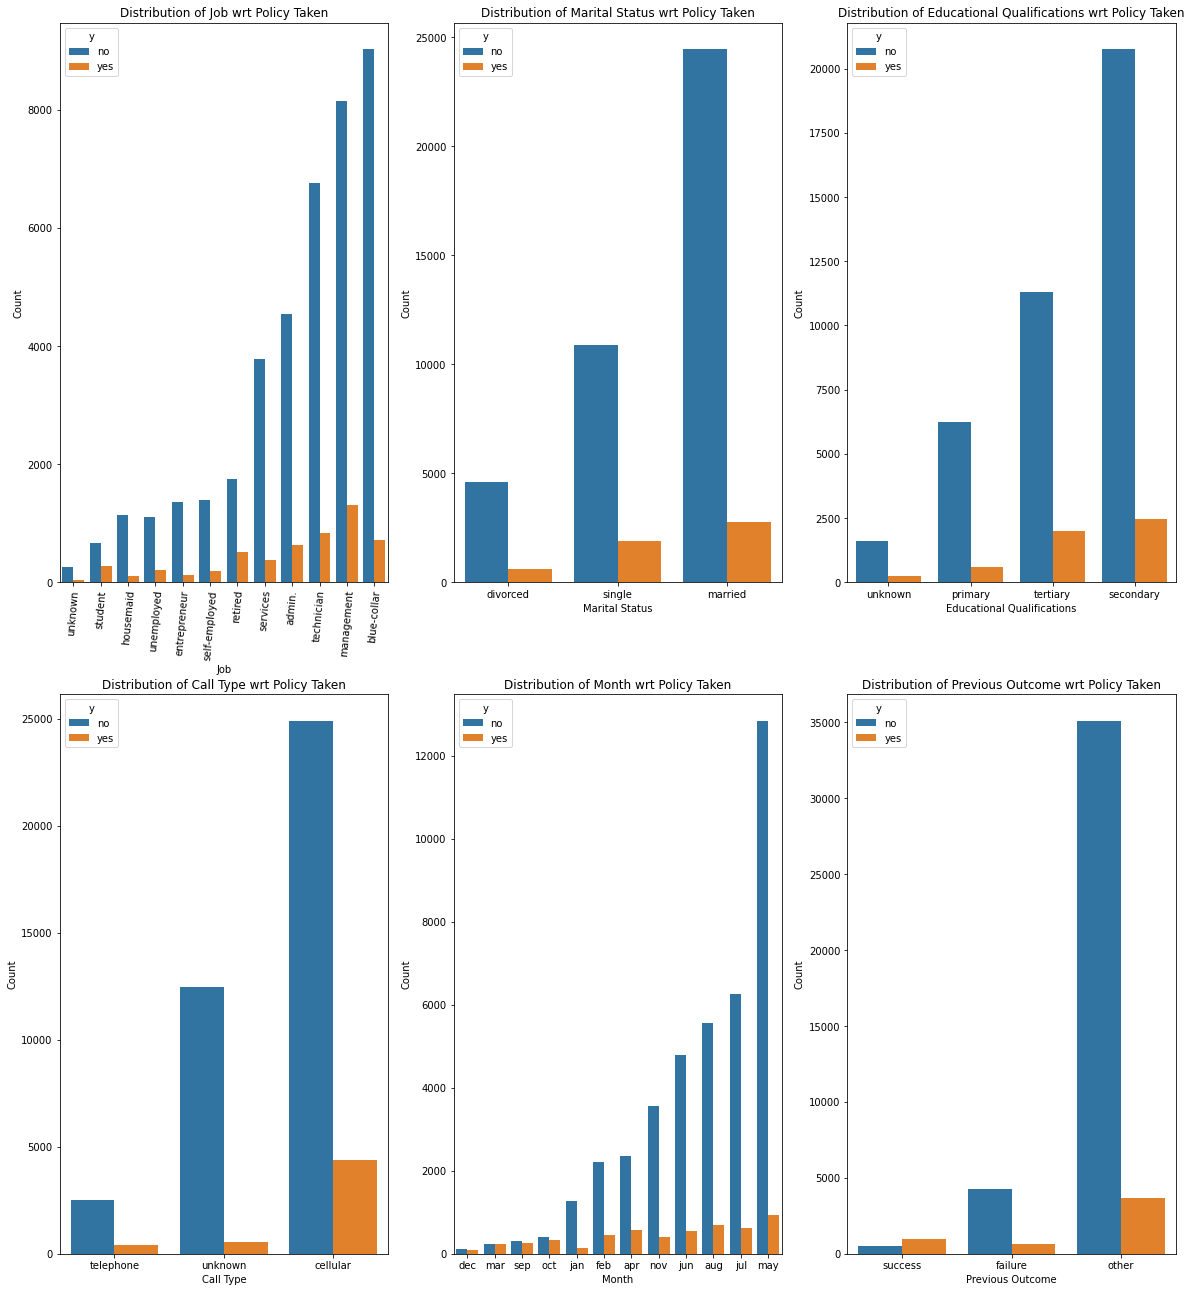

In [27]:
# plotting count plots for all the categorical columns
plt.figure(figsize=(20,35))

plt.subplot(331)
sns.countplot(x='job', hue='y', data=df, order=df['job'].value_counts().index[::-1])
plt.xticks(rotation=85)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Distribution of Job wrt Policy Taken')

plt.subplot(332)
sns.countplot(x='marital', hue='y', data=df, order=df['marital'].value_counts().index[::-1])
# plt.xticks(rotation=85)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status wrt Policy Taken')

plt.subplot(333)
sns.countplot(x='education_qual', hue='y', data=df, order=df['education_qual'].value_counts().index[::-1])
# plt.xticks(rotation=85)
plt.xlabel('Educational Qualifications')
plt.ylabel('Count')
plt.title('Distribution of Educational Qualifications wrt Policy Taken')

plt.subplot(334)
sns.countplot(x='call_type', hue='y', data=df, order=df['call_type'].value_counts().index[::-1])
# plt.xticks(rotation=85)
plt.xlabel('Call Type')
plt.ylabel('Count')
plt.title('Distribution of Call Type wrt Policy Taken')

plt.subplot(335)
sns.countplot(x='mon', hue='y', data=df, order=df['mon'].value_counts().index[::-1])
# plt.xticks(rotation=85)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Month wrt Policy Taken')

plt.subplot(336)
sns.countplot(x='prev_outcome', hue='y', data=df, order=df['prev_outcome'].value_counts().index[::-1])
# plt.xticks(rotation=85)
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.title('Distribution of Previous Outcome wrt Policy Taken')

plt.show()

In [28]:
# !pip install xgboost

# Encoding categorical columns & Splitting test and train 

In [29]:
df['y'] = le.fit_transform(df['y'])

In [30]:
# # Split data into training and testing sets
X = pd.get_dummies(df.drop("y", axis=1))
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

# Logistic Regression Model

In [32]:
# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Logistic Regression Train Accuracy:", logreg.score(X_train, y_train))
print("Logistic Regression Test Accuracy:", logreg.score(X_test, y_test))

y_pred_logreg = logreg.predict_proba(X_test)[:,1]
logreg_auc = roc_auc_score(y_test, y_pred_logreg)
print('Logistic Regression AUROC:', logreg_auc)



Logistic Regression Train Accuracy: 0.9016212116423854
Logistic Regression Test Accuracy: 0.8991299218404365
Logistic Regression AUROC: 0.9032714889375708


# KNN Model

In [33]:
# Fit KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("KNN Train Accuracy:", knn.score(X_train, y_train))
print("KNN Test Accuracy:", knn.score(X_test, y_test))

y_pred_knn = knn.predict_proba(X_test)[:,1]
knn_auc = roc_auc_score(y_test, y_pred_knn)
print('KNN AUROC:', knn_auc)



KNN Train Accuracy: 0.9076889043390324
KNN Test Accuracy: 0.8792213537826279
KNN AUROC: 0.74414371294787


# Random Forest Model

In [34]:
# Fit random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Random Forest Train Accuracy:", rf.score(X_train, y_train))
print("Random Forest Test Accuracy:", rf.score(X_test, y_test))

y_pred_rf = rf.predict_proba(X_test)[:,1]
rf_auc = roc_auc_score(y_test, y_pred_rf)
print('Random Forest AUROC:', rf_auc)




Random Forest Train Accuracy: 0.9999683974338717
Random Forest Test Accuracy: 0.9017843975814777
Random Forest AUROC: 0.9230191451145695


The Random Forest model has an extremely high train accuracy of 0.9999683974338717, which indicates that the model has **overfitted** the training data.

In [35]:
rf = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=10)
rf.fit(X_train, y_train)
print("Random Forest Train Accuracy:", rf.score(X_train, y_train))
print("Random Forest Test Accuracy:", rf.score(X_test, y_test))

y_pred_rf = rf.predict_proba(X_test)[:,1]
rf_auc = roc_auc_score(y_test, y_pred_rf)
print('Random Forest AUROC:', rf_auc)


Random Forest Train Accuracy: 0.9221312770596972
Random Forest Test Accuracy: 0.9016369267069754
Random Forest AUROC: 0.9176275475772709


# XG Boost Model

In [36]:
# Fit XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("XGBoost Train Accuracy:", xgb.score(X_train, y_train))
print("XGBoost Test Accuracy:", xgb.score(X_test, y_test))

y_pred_xgb = xgb.predict_proba(X_test)[:,1]
xgb_auc = roc_auc_score(y_test, y_pred_xgb)
print('XGBoost AUROC:', xgb_auc)

XGBoost Train Accuracy: 0.950668394273615
XGBoost Test Accuracy: 0.9054711694440348
XGBoost AUROC: 0.9290036026869608


As there is a difference between Train Accuracy and Test Accuracy of almost 5%. There is a possibilty of **overfitting.**

In [37]:

# Define the XGBoost model with early stopping
model = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, subsample=0.8, colsample_bytree=1, random_state=42)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric=["error", "auc"], eval_set=eval_set, verbose=False)

# Print the model performance
print("XGBoost Train Accuracy (with early stopping):", model.score(X_train, y_train))
print("XGBoost Test Accuracy (with early stopping):", model.score(X_test, y_test))

y_pred = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred)
print('XGBoost AUROC (with early stopping):', auc)


XGBoost Train Accuracy (with early stopping): 0.9181177511613943
XGBoost Test Accuracy (with early stopping): 0.9074620262498156
XGBoost AUROC (with early stopping): 0.9300014016217282


In [38]:
# y_pred = xgb.predict(X_test)

# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(results)


In [39]:
# # Predict the test set labels
# y_pred = xgb.predict(X_test)

# # Create a dataframe with the actual and predicted values
# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# # Filter out the rows where the actual and predicted values are the same
# df_wrong = df[df['Actual'] != df['Predicted']]

# # Show the wrongly predicted values
# print(df_wrong)


# Cross Validation of best performing models

In [40]:
from sklearn.model_selection import cross_val_score
import numpy as np

# XGBoost
xgb_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='roc_auc')
print("XGBoost Cross Validation Scores:", xgb_scores)
print("Average cross validation score for xgboost :", np.mean(xgb_scores))


# Logistic Regression
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc')
print("Logistic Regression Cross Validation Scores:", logreg_scores)
print("Average cross validation score:", np.mean(logreg_scores))



XGBoost Cross Validation Scores: [0.93062343 0.92312401 0.92478467 0.92561134 0.92797922]
Average cross validation score for xgboost : 0.9264245339967493
Logistic Regression Cross Validation Scores: [0.90406777 0.88679949 0.89388861 0.89636633 0.90279248]
Average cross validation score: 0.8967829379339595


<AxesSubplot: >

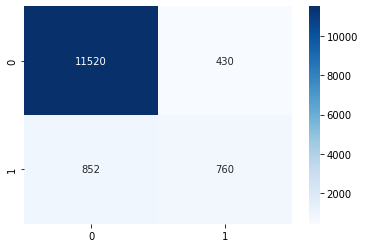

In [41]:
from sklearn.metrics import confusion_matrix

# Get predictions on test data
y_pred = xgb.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="d")



*Interpretation:*  
  
True Positives: 760  
True Negatives: 11513  
False Positives: 437  
False Negatives: 852  

<AxesSubplot: >

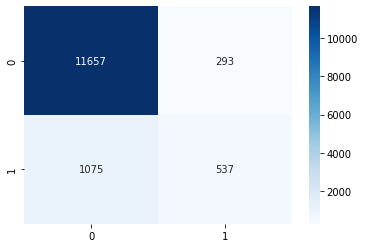

In [42]:
# Get predictions on test data
y_pred = logreg.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="d")



**Interpretations:**  
  
True Positives: 546  
True Negatives: 11638  
False Positives: 312  
False Negatives: 1066  

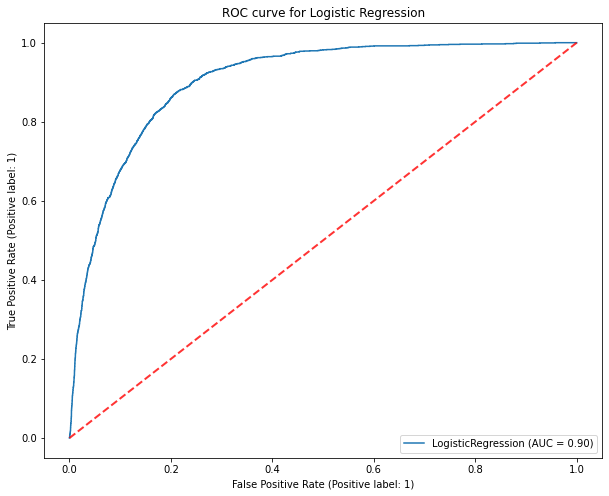

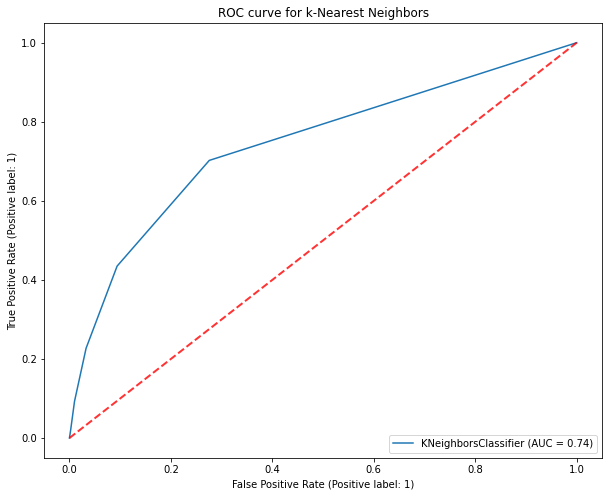

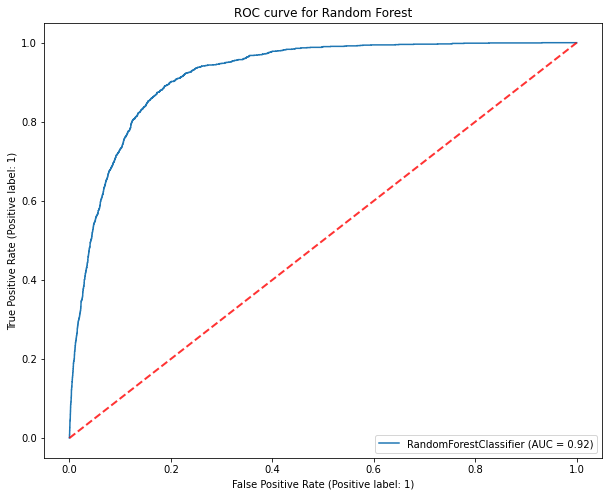

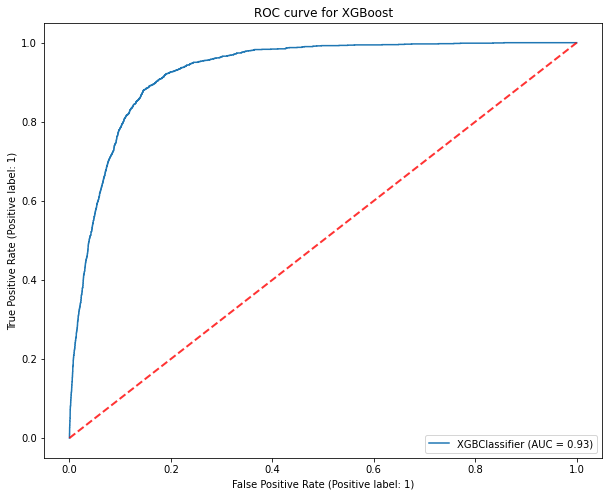

In [43]:
from sklearn.metrics import plot_roc_curve

# fit and evaluate logistic regression model
logreg.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10, 8))
plot_roc_curve(logreg, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
ax.set_title('ROC curve for Logistic Regression')

# fit and evaluate k-nearest neighbors model
knn.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10, 8))
plot_roc_curve(knn, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
ax.set_title('ROC curve for k-Nearest Neighbors')

# fit and evaluate random forest model
rf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10, 8))
plot_roc_curve(rf, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
ax.set_title('ROC curve for Random Forest')

# fit and evaluate xgboost model
xgb.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10, 8))
plot_roc_curve(xgb, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
ax.set_title('ROC curve for XGBoost')

plt.show()


XGBoost Train Accuracy (with early stopping): 0.9181177511613943  
XGBoost Test Accuracy (with early stopping): 0.9074620262498156  
XGBoost AUROC (with early stopping): 0.9300014016217282  

The XGBoost model achieved a train accuracy of 0.918 and a test accuracy of 0.907. This means that the model is able to predict the outcome correctly for around 91% of the cases. The AUROC (Area Under the Receiver Operating Characteristic curve) score for the logistic regression model is 0.93, which indicates that the model's ability to distinguish between positive and negative classes (i.e., conversion and non-conversion) is relatively good. The AUROC score ranges from 0.5 (random guessing) to 1 (perfect classification), so a score of 0.93 suggests that the model is performing moderately well.

The XGBoost AUROC with early stopping is the same as without early stopping, which is 0.930. This suggests that the model's ability to distinguish between positive and negative classes is consistent with or without early stopping.
